# The Goal
- Compare Final results of best performing models

# Step 1: Loading datasets and best-performing models

In [1]:
import tensorflow as tf
import sklearn
import numpy as np
from numpy import where
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import TensorBoard
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, cross_val_predict, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, f1_score, auc, roc_curve, precision_recall_curve, average_precision_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import collections
from collections import Counter
import logging
import os
import sys
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler


Using TensorFlow backend.


In [13]:
# preparing datasets
df = pd.read_csv('./creditcard.csv')
X = df.drop('Class', axis=1).values
Y = df.Class.values

seed = 1234
tf.random.set_seed(seed)
np.random.seed(seed)

x, x_test, y, y_test = train_test_split(X, Y, test_size=0.15, shuffle=True, random_state=seed)
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.15, shuffle=True, random_state=seed)

# applying SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# applying stratified random sample
x, x_test_strat, y, y_test_strat = train_test_split(X, Y, test_size=0.15, shuffle=True, random_state=seed, stratify=Y)
x_train_strat, x_cv_strat, y_train_strat, y_cv_strat = train_test_split(x, y, test_size=0.15, shuffle=True, random_state=seed, stratify=y)

# applying normalization
scaler=MinMaxScaler()
datasets = [x_cv, x_test, x_train_smote,x_train_strat]
norm_datasets = []
for set in datasets:
    normalized = scaler.fit_transform(set)
    norm_datasets.append(normalized)


In [17]:
# loading best performing models
lgmodel_best = tf.keras.models.load_model('./models/lgmodel_v7')
nnmodel_best = tf.keras.models.load_model('./models/nnmodel_v7')
xgbmodel_best = Classifier()
xgbmodel_best.load_model('./models/xgbmodel_v4.json')

## test models on test set
(Test set has not been used up to this point.)

Logistic Regression model, with SMOTE, normalization, and hyperparameter tuning.

/Users/solinakim/opt/anaconda3/envs/mypython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42641
           1       0.75      0.67      0.71        81

    accuracy                           1.00     42722
   macro avg       0.87      0.83      0.85     42722
weighted avg       1.00      1.00      1.00     42722



'roc auc score: 0.833122268864864'

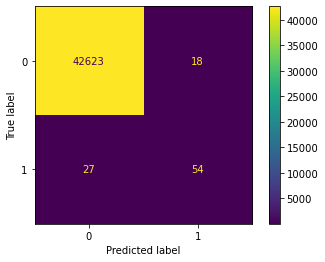

In [6]:
index = datasets.index(x_test)
y_predicted = lgmodel_best.predict(norm_datasets[index]) > 0.5 # testing on original cv set for valid comparison to previous models
cm = confusion_matrix(y_test, y_predicted)
dp1 = ConfusionMatrixDisplay(confusion_matrix=cm)
dp1.plot()
print(classification_report(y_test, y_predicted))
display(f'roc auc score: {roc_auc_score(y_test, y_predicted)}')


Neural network with normalization, stratified sampling, and hyperparamter tuning

/Users/solinakim/opt/anaconda3/envs/mypython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42641
           1       0.58      0.79      0.67        81

    accuracy                           1.00     42722
   macro avg       0.79      0.89      0.83     42722
weighted avg       1.00      1.00      1.00     42722



'roc auc score: 0.8945223414200846'

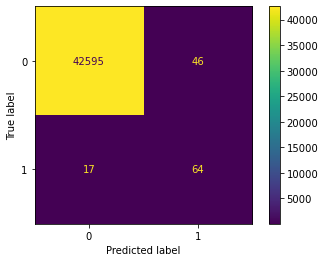

In [7]:
index = datasets.index(x_test)
y_predicted = nnmodel_best.predict(norm_datasets[index]) > 0.5 # testing on original cv set for valid comparison to previous models
cm = confusion_matrix(y_test, y_predicted)
dp1 = ConfusionMatrixDisplay(confusion_matrix=cm)
dp1.plot()
print(classification_report(y_test, y_predicted))
display(f'roc auc score: {roc_auc_score(y_test, y_predicted)}')


XGBoost Classification tree with SMOTE (no normalization)

In [18]:
index = datasets.index(x_cv)
pred_class = xgbmodel_best.predict(norm_datasets[index])
cm = confusion_matrix(y_cv, pred_class)
dp1 = ConfusionMatrixDisplay(confusion_matrix=cm)
dp1.plot()
print(classification_report(y_cv, pred_class))
display(f'roc auc score: {roc_auc_score(y_cv, pred_class)}')

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'numpy.ndarray'>)